In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

%matplotlib inline

In [3]:
### dataframe 로드 ###

df = pd.read_csv('smoking.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


### 컬럼 정리

- gender 성별
- age 나이
- height 키
- weight 몸무게
- waist 허리둘레
- eyesight(left, right) 왼쪽 시력, 오른쪽 시력
- hearing(left, right) 왼쪽 청력, 오른쪽 청력


- <혈액>
- systolic 최고혈압(대동맥 내로 보내지는 심실 수축기의 혈압)
- relaxation 최저혈압(이완기 혈압)
- fasting blood sugar 공복혈당
- hemoglobin 헤모글로빈 수치


- <비만>
- age 연령
- Cholesterol 총 콜레스테롤
- triglyceride 중성지방
    -  정상 -150mg/dL 미만, 경계 150-199mg/dL, 위험 200mg/dL-
- HDL 고밀도지단백 (콜레스테롤)
- LDL 저밀도지단백 (콜레스테롤)
- systolic 최고혈압(대동맥 내로 보내지는 심실 수축기의 혈압)
- relaxation 최저혈압(이완기 혈압)
- fasting blood sugar 공복혈당
- height 키
- weight 몸무게
- BMI컬럼 추가
- waist 허리둘레


<br/>
<br/>

- 참고
    - 체질량지수(BMI) = 몸무게(kg) / 키 (m2)
    - 한국의 비만 진단 기준은 체질량지수 25-29.9 인 경우 과체중, 30이상인 경우 비만
    - ![비만정의](https://user-images.githubusercontent.com/93986157/202641559-2356bb5a-114a-4ff5-9feb-82f9b692cf3c.png)
    - 고혈압: SBP≥ 140 mmHg or DBP≥ 90 mmHg
    - LDL : 100미만일 경우 정상으로 판단
    - HDL : 40 이상일 경우 정상으로 판단


- <신장>
- Urine protein 단백뇨
- serum creatinine 혈액 또는 소변에서 크레아티닌 양 측정 - *신장*관련



- AST 아스파르테이트 아미노 전달효소 *간*
- ALT 알라닌 아미노 전달효소 *간* 
    - AST, ALT의 정상 범위 ~40, 경도 40~ 200, 중등도 200~400, 중증 400~
- Gtp 감마 Gtp간 기능 검사 *알코올 관련*
    - 정상 ~50, 가벼운 증가 51~100, 중간정도의 증가 101~200, 고도의 증가 201~500, 초고도 증가 500~
    - 술 마시지 않는 사람도 높게 나올 수 있다.
    
    
- oral 구강검사 여부
- dental caries 충치 갯수
- tartar 치석존재여부

In [4]:
df.isna().sum(axis = 0)
df.isnull().sum(axis = 0)

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [5]:
df = df.replace({'N':'0','Y':'1','F':'0','M':'1', })
#gender = {'F': 0, 'M': 1} oral = {'N': 0, 'T': 1} tartar = {'N': 0, 'T': 1}
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1,0
1,1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,1,0,1,0
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,1,0,0,1
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,1,0,1,0
4,4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,0,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,1,1,1,0
55688,55681,0,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,1,0,1,0
55689,55683,0,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,1,0,0,0
55690,55684,1,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,1,0,0,0


In [20]:
### 비만 데이터프레임 ###

df_obe = df.iloc[:, [2,3,4,5, 10,11,12,13,14,15,16]]
df_obe
rename = df_obe.rename(columns={'height(cm)':'height', 'weight(kg)':'weight', 'waist(cm)':'waist'})
rename

rename.insert(3, 'BMI', rename['weight']/(rename['height']*rename['height']), 0)

target = df.iloc[:,-1]
obesity = pd.concat([rename, target], axis = 1)
obesity

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL
0,40,155,60,81.3,114.0,73.0,94.0,215.0,82.0,73.0,126.0
1,40,160,60,81.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0
2,55,170,60,80.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0
3,40,165,70,88.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0
4,40,155,60,86.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...
55687,40,170,65,75.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0
55688,45,160,50,70.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0
55689,55,160,50,68.5,117.0,72.0,88.0,158.0,77.0,79.0,63.0
55690,60,165,60,78.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0


,age,height,weight,waist,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL
0,40,155,60,81.3,114.0,73.0,94.0,215.0,82.0,73.0,126.0
1,40,160,60,81.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0
2,55,170,60,80.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0
3,40,165,70,88.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0
4,40,155,60,86.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...
55687,40,170,65,75.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0
55688,45,160,50,70.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0
55689,55,160,50,68.5,117.0,72.0,88.0,158.0,77.0,79.0,63.0
55690,60,165,60,78.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0


,age,height,weight,BMI,waist,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,smoking
0,40,155,60,0.002497,81.3,114.0,73.0,94.0,215.0,82.0,73.0,126.0,0
1,40,160,60,0.002344,81.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,0
2,55,170,60,0.002076,80.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,1
3,40,165,70,0.002571,88.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,0
4,40,155,60,0.002497,86.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,170,65,0.002249,75.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,0
55688,45,160,50,0.001953,70.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,0
55689,55,160,50,0.001953,68.5,117.0,72.0,88.0,158.0,77.0,79.0,63.0,0
55690,60,165,60,0.002204,78.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,0


In [31]:
obesity.describe()

,age,height,weight,BMI,waist,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,0.002417,82.046418,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,0.367288
std,12.071418,9.194597,12.820306,0.000348,9.274223,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,0.482070
min,20.000000,130.000000,30.000000,0.001427,51.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,0.000000
25%,40.000000,160.000000,55.000000,0.002160,76.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,0.000000
50%,40.000000,165.000000,65.000000,0.002388,82.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,0.000000
75%,55.000000,170.000000,75.000000,0.002612,88.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,1.000000
max,85.000000,190.000000,135.000000,0.004245,129.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,1.000000


In [21]:
corr_obe = obesity.corr()
corr_obe

,age,height,weight,BMI,waist,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,smoking
age,1.000000,-0.479528,-0.324706,-0.063384,-0.026297,0.134023,0.050745,0.182351,0.055557,0.015102,0.007047,0.043007,-0.162557
height,-0.479528,1.000000,0.675656,0.140233,0.378902,0.080585,0.113193,0.019619,-0.082161,0.156693,-0.213284,-0.048419,0.396675
weight,-0.324706,0.675656,1.000000,0.819904,0.822842,0.266131,0.271634,0.136237,0.026403,0.324429,-0.358868,0.040560,0.302780
BMI,-0.063384,0.140233,0.819904,1.000000,0.819226,0.299640,0.280662,0.171535,0.094269,0.316197,-0.321877,0.088781,0.106967
waist,-0.026297,0.378902,0.822842,0.819226,1.000000,0.316922,0.292627,0.211132,0.065467,0.361922,-0.376203,0.072817,0.226259
systolic,0.134023,0.080585,0.266131,0.299640,0.316922,1.000000,0.761051,0.172700,0.059572,0.198826,-0.088487,0.016569,0.073109
relaxation,0.050745,0.113193,0.271634,0.280662,0.292627,0.761051,1.000000,0.147879,0.095357,0.215541,-0.089410,0.041017,0.108309
fasting blood sugar,0.182351,0.019619,0.136237,0.171535,0.211132,0.172700,0.147879,1.000000,0.009903,0.227746,-0.121274,-0.019615,0.100279
Cholesterol,0.055557,-0.082161,0.026403,0.094269,0.065467,0.059572,0.095357,0.009903,1.000000,0.247581,0.168623,0.738975,-0.028548
triglyceride,0.015102,0.156693,0.324429,0.316197,0.361922,0.198826,0.215541,0.227746,0.247581,1.000000,-0.411752,0.025739,0.251799


<Figure size 936x936 with 0 Axes>

<AxesSubplot:>

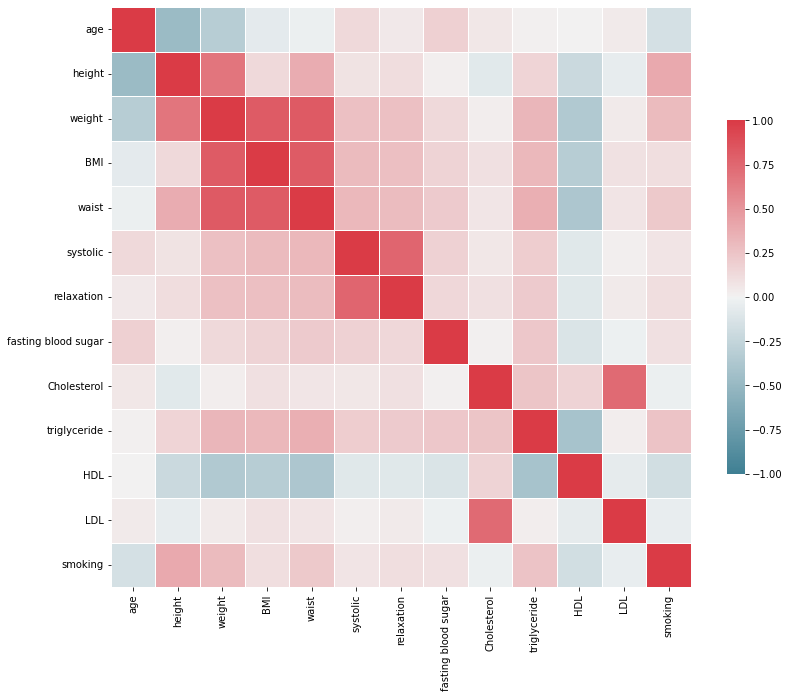

In [22]:
### 상관관계 시각화 ###

cmap = sns.diverging_palette(220,10,as_cmap=True)

plt.figure(figsize =(13,13))
sns.heatmap(corr_obe, cmap = cmap, vmax=1.0, vmin = -1.0, center =0, square= True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(obesity.iloc[:, :-1], obesity.iloc[:, -1], test_size = 0.33, random_state = 42)

LogisticRegression(max_iter=10000)

['MINIproject']

0.6993307579302465

0.6993307579302465

confusion_matrix : 
 [[9765 1830]
 [2082 4702]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

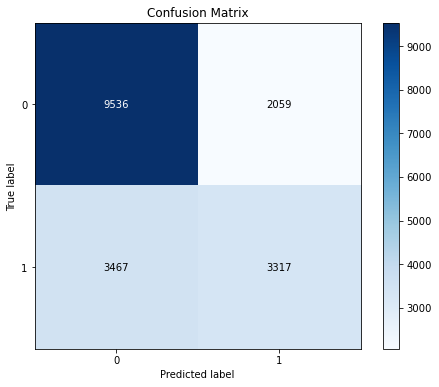

In [27]:
### 모델 - Logistic Regression ###

from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter = 10000)

model2.fit(X_train,y_train)

import joblib
joblib.dump(model2, 'MINIproject')

model2.score(X_test,y_test)
pred_2 = model2.predict(X_test)
acc2 = accuracy_score(y_test,pred_2)
acc2

# 실제 , 예측
cm_2 = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm_2)

skplt.metrics.plot_confusion_matrix(y_test,pred_2,figsize=(8,6))
plt.show()

DecisionTreeClassifier()

0.738995592796126

confusion_matrix : 
 [[9157 2438]
 [2359 4425]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

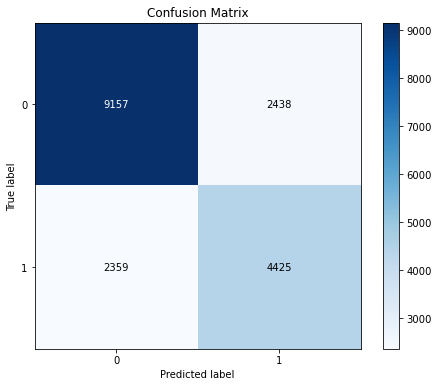

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


model = DecisionTreeClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred) 
acc 

from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 
pred = model.predict(X_test) # 실제 , 예측 
cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()

SVC()

0.7013983350563143

confusion_matrix : 
 [[9841 1754]
 [3734 3050]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

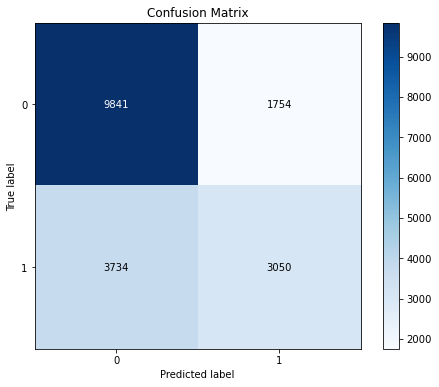

In [25]:
from sklearn import svm
from sklearn.metrics import accuracy_score


model = svm.SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred) 
acc 

from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 
pred = model.predict(X_test) # 실제 , 예측 
cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()

RandomForestClassifier()

0.7871483758637575

confusion_matrix : 
 [[9765 1830]
 [2082 4702]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

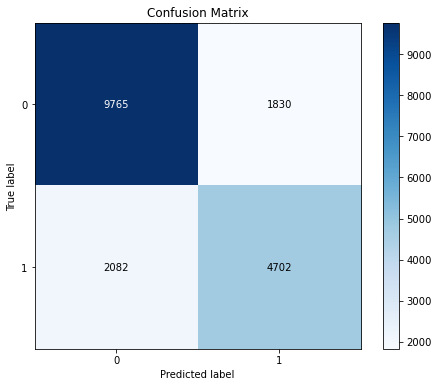

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred) 
acc 

from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 
pred = model.predict(X_test) # 실제 , 예측 
cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()

[0]	validation_0-logloss:0.62073
[1]	validation_0-logloss:0.58099
[2]	validation_0-logloss:0.55732
[3]	validation_0-logloss:0.54245
[4]	validation_0-logloss:0.53373
[5]	validation_0-logloss:0.52734
[6]	validation_0-logloss:0.52316
[7]	validation_0-logloss:0.52039
[8]	validation_0-logloss:0.51783
[9]	validation_0-logloss:0.51628
[10]	validation_0-logloss:0.51493
[11]	validation_0-logloss:0.51377
[12]	validation_0-logloss:0.51328
[13]	validation_0-logloss:0.51276
[14]	validation_0-logloss:0.51204
[15]	validation_0-logloss:0.51181
[16]	validation_0-logloss:0.51142
[17]	validation_0-logloss:0.51094
[18]	validation_0-logloss:0.51081
[19]	validation_0-logloss:0.51072
[20]	validation_0-logloss:0.51055
[21]	validation_0-logloss:0.51052
[22]	validation_0-logloss:0.51027
[23]	validation_0-logloss:0.50989
[24]	validation_0-logloss:0.50985
[25]	validation_0-logloss:0.50971
[26]	validation_0-logloss:0.50967
[27]	validation_0-logloss:0.50941
[28]	validation_0-logloss:0.50883
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.7349692583927309

confusion_matrix : 
 [[9234 2361]
 [2510 4274]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

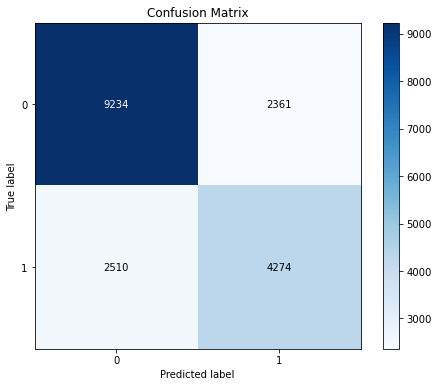

In [32]:
### 모델 - XGboost ###

import xgboost as xgb
from sklearn.metrics import accuracy_score


model = xgb.XGBClassifier(early_stopping_rounds = 10)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set = eval_set)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred) 
acc 

from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 
pred = model.predict(X_test) # 실제 , 예측 
cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()

99
0.5043466399102624


0.5043466413817486

array([0.04972769, 0.60573816, 0.02695085, 0.03261333, 0.03085568,
       0.03034884, 0.02997304, 0.03089015, 0.02789597, 0.07058325,
       0.03268052, 0.03174239], dtype=float32)

<BarContainer object of 12 artists>

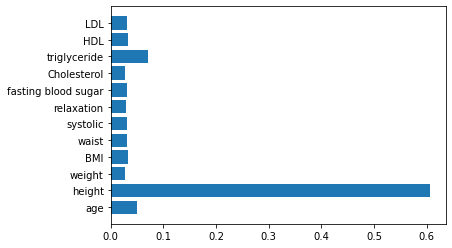

In [34]:
# best_iteration
print(model.best_iteration)
print(model.best_score)

from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

# feature_importances_
import matplotlib.pyplot as plt 
model.feature_importances_
plt.barh(obesity.iloc[:,:-1].columns, model.feature_importances_)

[1]	valid_0's binary_logloss: 0.636872
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.618924
[3]	valid_0's binary_logloss: 0.60429
[4]	valid_0's binary_logloss: 0.591922
[5]	valid_0's binary_logloss: 0.581612
[6]	valid_0's binary_logloss: 0.572825
[7]	valid_0's binary_logloss: 0.565437
[8]	valid_0's binary_logloss: 0.55909
[9]	valid_0's binary_logloss: 0.553633
[10]	valid_0's binary_logloss: 0.54906
[11]	valid_0's binary_logloss: 0.545017
[12]	valid_0's binary_logloss: 0.541831
[13]	valid_0's binary_logloss: 0.539429
[14]	valid_0's binary_logloss: 0.536959
[15]	valid_0's binary_logloss: 0.534797
[16]	valid_0's binary_logloss: 0.532447
[17]	valid_0's binary_logloss: 0.530507
[18]	valid_0's binary_logloss: 0.529085
[19]	valid_0's binary_logloss: 0.527853
[20]	valid_0's binary_logloss: 0.526818
[21]	valid_0's binary_logloss: 0.525658
[22]	valid_0's binary_logloss: 0.52453
[23]	valid_0's binary_logloss: 0.523472
[24]	valid_0's binary_logloss: 0

LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

0.7185374612329288

confusion_matrix : 
 [[9050 2545]
 [2628 4156]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

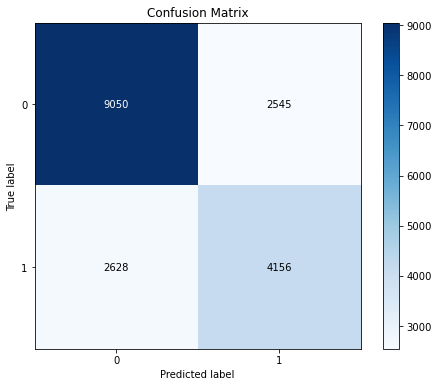

67
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.5146043785130928)])})


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

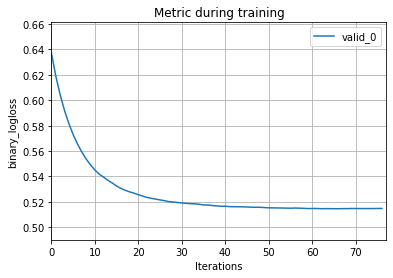

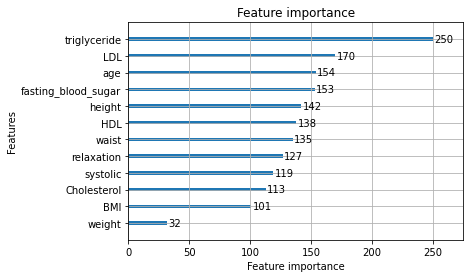

In [35]:
### 모델 lightgbm ###

import lightgbm as lgb

model = lgb.LGBMClassifier(boosting_type = 'goss', max_depth = 5, random_state = 0)
eval_set = [(X_test, y_test)]
callbacks = []
callbacks.append(lgb.early_stopping(stopping_rounds = 10))
callbacks.append(lgb.log_evaluation())
model.fit(X_train, y_train, eval_set=eval_set, callbacks = callbacks)

pred = model.predict(X_test)
acc = accuracy_score(y_test, pred) 
acc 

from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()

print(model.best_iteration_)
print(model.best_score_)

lgb.plot_metric(model)

lgb.plot_importance(model)